# Analyse von ÖV- und Wetterdaten

---
## 1 Einleitung

Zuverlässigkeit und Pünktlichkeit sind entscheidende Qualitätsmerkmale des öffentlichen Verkehrs. Gerade in einer Stadt wie Zürich, in der das Tramnetz einen wichtigen Bestandteil des städtischen Mobilitätsangebots darstellt, können Verspätungen zu spürbaren Einschränkungen im Alltag der Bevölkerung führen. Neben betrieblichen und infrastrukturellen Faktoren wird vermutet, dass auch das Wetter - wie etwa Regen, Schnee, Sonneneinstrahlung oder Temperaturschwankungen - eine wesentliche Rolle bei der Entstehung von Verspätungen spielt.

Im Rahmen der Projektarbeit im Modul "Business Intelligence and Business Analytics" soll untersucht werden, ob und inwieweit das Wetter die Pünktlichkeit des Trambetriebs in der Stadt Zürich im Zeitraum von Januar 2023 bis Dezember 2024 beeinflusst hat. Dabei soll nicht nur geprüft werden, ob es statistische signifikante Zusammenhänge gibt, sondern auch, welche Wetterphänomene besonders ausschlaggebend sind und ob sich daraus Muster für zukünftige Entwicklungen ableiten lassen.

Die Analyse erfolgt datenbasiert und verknüpft Fahrplandaten der Zürcher Verkehrsbetriebe mit meterologischen Informationen. Ziel ist es, eine fundierte Grundlage für eine Handlungsempfehlung auf Managementebene zu schaffen, die zur Verbesserung der Betriebsführung beitragen können.

### 1.1 Zielsetzung und Forschungsfragen

Das Hauptziel dieser Arbeit besteht darin, den Einfluss verschiedener Wetterbedingungen auf die Pünktlichkeit des Trambetriebs in der Stadt Zürich systematisch zu analysieren. Durch den Vergleich von Wetter- und Verspätungsdaten für den Zeitraum 2023-2024 sollen belastbare Aussagen darüber getroffen werden, ob und wann wetterbedingte Beeinträchtigungen auftreten.

Folgende Forschungsfragen stehen dabei im Mittelpunkt:
- Lassen sich statistisch signifikante Zusammenhänge zwischen bestimmten Wetterereignissen und ÖV-Verbindungen identifizieren?
- Welche Wetterfaktoren haben den grössten Einfluss auf die Pünktlichkeit?
- In welchen Zeiträumen oder auf welchen Linien treten wetterbedingte Verspätungen häufig auf?
- Welche praktische Empfehlungen lassen sich aus den - Ergebnissen für die betriebliche Planung und Steuerung ableiten?
- ...?

### 1.2 Methodisches Vorgehen

Das Vorgehen in dieser Arbeit orientiert sich am fünfstufigen Framework zur datenbasierten Entscheidungsfindung nach Bernhard Marr (2020). Es umfasst die Definition des Informationsbedarfs, die Erhebung und Aufbereitung der relevanten Daten, die Durchführung der Analyse sowie die Darstellung der Ergebnisse.

Im ersten Schritt werden die Ziele und der Informationsbedarf anhand der definierten Forschungsfragen definiert (Kapitel 1.1).

In Kapitel 2 werden die verwendeten Datenquellen vorgestellt, die Datenqualität überprüft und der Prozess der Datenaufbereitung beschrieben. Dabei werden die Wetterdaten der Stadt Zürich und die ÖV-Betriebsdaten des Zürcher Verkehrsbetriebs berücksichtigt.

In Kapitel 3 erfolgt die Analyse der Daten, wobei verschieddene statistische Verfahren und Methoden zur Aufdeckung von Zusammenhängen und Mustern eingesetzt werden.

Die gewonnenen Erkenntnisse werden in Kapitel 4 in Form von Visualisierungen und einer managementgerechten Ergebnisdarstellung aufbereitet.

Ziel ist es, am Ende der Arbeit eine fundierte Datenbasis und erste Handlungsempfehlungen zur Verfügung zu stellen, die als Grundlage für zukünftige Optimierungsmassnahmen des öffentlichen Verkehrs der Stadt Zürich dienen können.

---
## 2 Daten

### 2.1 Quellen

Verkehr


Wetter:
Die Wetterdaten wurden vom Datenportal IDAweb (https://gate.meteoswiss.ch/idaweb) von MeteoSchweiz bezogen. Das Portal bietet Universitäten, (Fach-)Hochschulen und Schulen die Möglichkeit, Bodenstationsdaten von MeteoSchweiz zu beziehen.

### 2.2 Import, Bereinigung und Transformation

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### 2.2.1 Verkehrsdaten

##### 2.2.1.1 Laden des Datensatz

Laden der benötigten Packages für den Import und die Analyse

Laden eines einzelnen Datensatz auf Tagesbasis als Grundlage für die Datenbereinigung

In [ ]:
df_verkehr_daily_raw = pd.read_csv("Verkehrsdaten_daily.csv", sep=";", encoding="utf-8", low_memory=False) #Laden der CSV-Datei

display(df_verkehr_daily_raw.head(5)) #Anzeige der ersten 5 Zeilen
display(df_verkehr_daily_raw.info()) #Anzeige der Informationen des DataFrames

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,01.01.2024,80:06____:17291:000,80:06____,DB,DB Regio AG Baden-Württemberg,Zug,17291,RB,NaN,RB,...,True,8500090,Basel Bad Bf,NaN,NaN,UNBEKANNT,01.01.2024 01:05,NaN,UNBEKANNT,False
1,01.01.2024,80:06____:70665:000,80:06____,DB,DB Regio AG Baden-Württemberg,Zug,70665,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaN,NaN,NaN,01.01.2024 01:05,01.01.2024 01:06:00,PROGNOSE,False
2,01.01.2024,80:800631:17238:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17238,RB,NaN,RB,...,False,8500090,Basel Bad Bf,01.01.2024 07:05,01.01.2024 07:05:00,PROGNOSE,NaN,NaN,NaN,False
3,01.01.2024,80:800631:17239:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17239,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaN,NaN,NaN,01.01.2024 07:53,01.01.2024 07:53:00,PROGNOSE,False
4,01.01.2024,80:800631:17241:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17241,RB,NaN,RB,...,False,8500090,Basel Bad Bf,NaN,NaN,NaN,01.01.2024 08:53,01.01.2024 08:54:00,PROGNOSE,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501831 entries, 0 to 1501830
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   BETRIEBSTAG          1501831 non-null  object
 1   FAHRT_BEZEICHNER     1501831 non-null  object
 2   BETREIBER_ID         1501831 non-null  object
 3   BETREIBER_ABK        1501831 non-null  object
 4   BETREIBER_NAME       1501831 non-null  object
 5   PRODUKT_ID           1501831 non-null  object
 6   LINIEN_ID            1501831 non-null  object
 7   LINIEN_TEXT          1501831 non-null  object
 8   UMLAUF_ID            688303 non-null   object
 9   VERKEHRSMITTEL_TEXT  1501831 non-null  object
 10  ZUSATZFAHRT_TF       1501831 non-null  bool  
 11  FAELLT_AUS_TF        1501831 non-null  bool  
 12  BPUIC                1501831 non-null  int64 
 13  HALTESTELLEN_NAME    1389616 non-null  object
 14  ANKUNFTSZEIT         1413665 non-null  object
 15  AN_PROGNOSE    

None

##### 2.2.1.2 Nicht relevante Spalten entfernen

Spalten welche offensichtlich nicht zur Analyse beitragen werden entfernt:
- **BETRIEBSTAG:** *Das Datum ist bereits in der Abfahrtszeit enthalten – daher überflüssig*
- **FAHRT_BEZEICHNER:** *Numerische Bezeichnung der Fahrt, die für die Analyse keinen Mehrwert bietet*
- **BETREIBER_ID:** *Numerische ID des Betreibers, redundant da BETREIBER_ABK ausreichend ist*
- **BETREIBER_NAME:** *Vollständiger Name des Betreibers, ebenfalls durch BETREIBER_ABK abgedeckt*
- **LINIEN_ID:** *Numerischer Identifikator der Linie, wobei LINIEN_TEXT klarere Informationen liefert*
- **UMLAUF_ID:** *Numerische Fahrtbezeichnung, die für die Analyse nicht relevant ist*
- **VERKEHRSMITTEL_TEXT:** *Abkürzung zu PRODUKT_ID – somit nicht erforderlich*
- **BPUIC:** *Nicht aussagekräftig für die Analyse*
- **ANKUNFTSZEIT:** *Wird nicht betrachtet, da ausschließlich Abfahrtszeiten relevant sind*
- **AN_PROGNOSE:** *Nicht genutzt, da nur Abfahrtszeiten im Fokus stehen*
- **AN_PROGNOSE_STATUS:** *Status der Ankunftsprognose wird nicht analysiert – daher entbehrlich*

In [15]:
df_verkehr_daily = df_verkehr_daily_raw.drop(columns=["BETRIEBSTAG", "FAHRT_BEZEICHNER", "BETREIBER_ID", "BETREIBER_NAME", "LINIEN_ID", "UMLAUF_ID", "VERKEHRSMITTEL_TEXT", "BPUIC", "ANKUNFTSZEIT", "AN_PROGNOSE", "AN_PROGNOSE_STATUS"])
display(df_verkehr_daily.head())

,BETREIBER_ABK,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,DB,Zug,RB,True,True,Basel Bad Bf,01.01.2024 01:05,NaN,UNBEKANNT,False
1,DB,Zug,RB,True,False,Basel Bad Bf,01.01.2024 01:05,01.01.2024 01:06:00,PROGNOSE,False
2,DB,Zug,RB,False,False,Basel Bad Bf,NaN,NaN,NaN,False
3,DB,Zug,RB,False,False,Basel Bad Bf,01.01.2024 07:53,01.01.2024 07:53:00,PROGNOSE,False
4,DB,Zug,RB,False,False,Basel Bad Bf,01.01.2024 08:53,01.01.2024 08:54:00,PROGNOSE,False


##### 2.2.1.3 Filterung der Daten 

Filtern nach Daten der Zürcher Verkehrsbetriebe (VBZ) mit anschliessender Kontrolle und löschung der Spalte

In [16]:
filter_produkt = df_verkehr_daily["PRODUKT_ID"] == "Tram"
filter_betreiber = df_verkehr_daily["BETREIBER_ABK"].astype(str).str.contains("VBZ", na=False)

df_verkehr_daily_filtered = df_verkehr_daily[filter_produkt & filter_betreiber]

# Kontrolle der Filterung
print(df_verkehr_daily_filtered["PRODUKT_ID"].value_counts())
print(df_verkehr_daily_filtered["BETREIBER_ABK"].value_counts())

PRODUKT_ID
Tram    69637
Name: count, dtype: int64
BETREIBER_ABK
VBZ    Fpl    69637
Name: count, dtype: int64


Nach erfolgreicher Prüfung werden die beiden gefilterten Spalten entfernt

In [17]:
# Nicht mehr benötigte Spalten entfernen
df_verkehr_daily_filtered = df_verkehr_daily_filtered.drop(columns=["PRODUKT_ID", "BETREIBER_ABK"])

display(df_verkehr_daily_filtered.head())

,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
262646,2,False,False,"Zürich,Kalkbreite/Bhf.Wiedikon",01.01.2024 04:51,01.01.2024 04:52:03,REAL,False
262647,2,False,False,"Zürich, Bezirksgebäude",01.01.2024 04:52,01.01.2024 04:53:27,REAL,False
262648,2,False,False,"Zürich, Stauffacher",01.01.2024 04:54,01.01.2024 04:55:26,REAL,False
262649,2,False,False,"Zürich, Sihlstrasse",01.01.2024 04:55,01.01.2024 04:57:26,REAL,False
262650,2,False,False,"Zürich, Paradeplatz",01.01.2024 04:57,01.01.2024 04:59:19,REAL,False


##### 2.2.1.4 Analyse der übrigen Spalten

AB_PROGNOSE_STATUS
REAL          64953
PROGNOSE       1383
UNBEKANNT       147
GESCHAETZT      140
Name: count, dtype: int64
ZUSATZFAHRT_TF
False    0.9743
True     0.0257
Name: count, dtype: float64
FAELLT_AUS_TF
False    0.9474
True     0.0526
Name: count, dtype: float64
DURCHFAHRT_TF
False    1.0
Name: count, dtype: float64


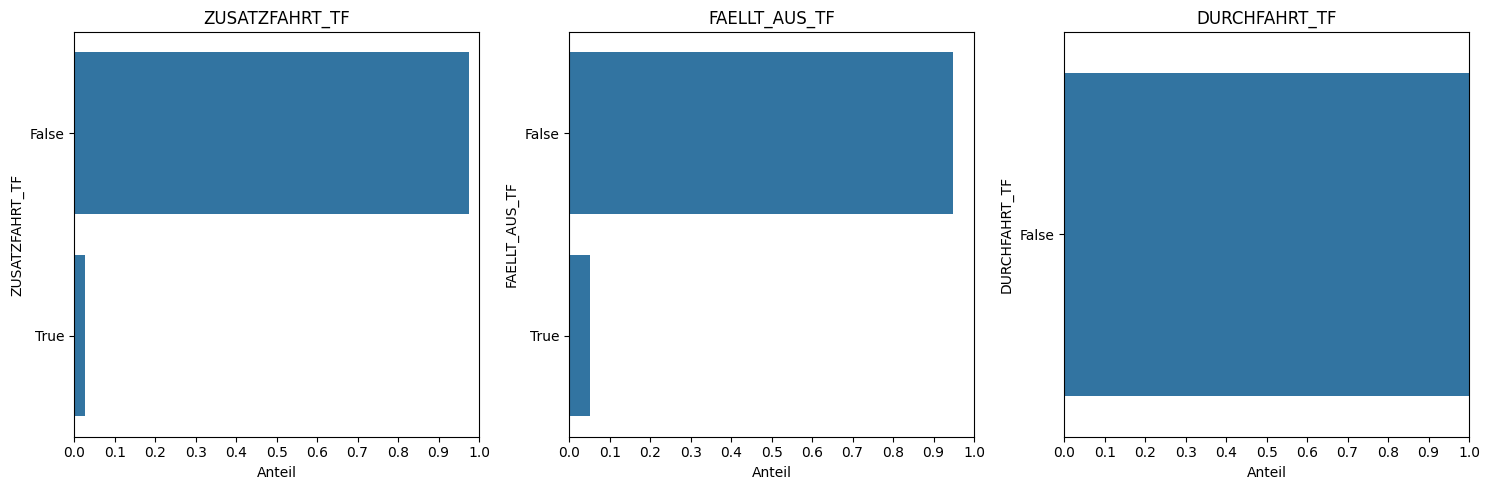

In [ ]:
print(df_verkehr_daily_filtered["AB_PROGNOSE_STATUS"].value_counts())
print((df_verkehr_daily_filtered["ZUSATZFAHRT_TF"].value_counts() / len(df_verkehr_daily_filtered)).round(4))
print((df_verkehr_daily_filtered["FAELLT_AUS_TF"].value_counts() / len(df_verkehr_daily_filtered)).round(4))
print(df_verkehr_daily_filtered["DURCHFAHRT_TF"].value_counts() / len(df_verkehr_daily_filtered))

bool_cols = ["ZUSATZFAHRT_TF", "FAELLT_AUS_TF", "DURCHFAHRT_TF"]

# Erstelle 1 Zeile mit 3 Spalten (nebeneinander)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

for i, col in enumerate(bool_cols):
    anteile = df_verkehr_daily_filtered[col].value_counts(normalize=True).sort_index()
    
    sns.barplot(
        x=anteile.values,
        y=anteile.index,
        orient='h',
        ax=axes[i]
    )
    
    axes[i].set_title(f"{col}")
    axes[i].set_xlim(0, 1)
    axes[i].set_xlabel("Anteil")
    axes[i].set_xticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.show()

Erkenntnisse 
- AB PROGNOSE_STATUS: Gemäss Cookbook der Verkehrsdaten sind nur die Prognosen mit dem Status REAL und GESCHAETZT als relevant anzusehen, alle anderen Werte werden darum entfernt
- ZUSATZFAHRT_TF: Da es im ganzen Dataframe nur 0.02% Zusatzfrahrten gibt und diese zudem keine relevanten Beitrag zur Beantwortung der gestellten Frage leisten werden alle TRUE Werte entfernt
- FAELLT_AUS_TF: Da es im ganzen Dataframe nur 0.05% Zusatzfrahrten gibt und diese zudem keine relevanten Beitrag zur Beantwortung der gestellten Frage leisten werden alle TRUE Werte entfernt
- DURCHFAHRT_TF: Obwohl es in diesem Dataframe keine Durchfahrten werden alle zukünftigen Dataframes nach FALSE Werten gefiltert um alle Durchfahrten auszuschliessen


In [19]:
filter_status = df_verkehr_daily_filtered["AB_PROGNOSE_STATUS"].astype(str).str.contains("REAL|GESCHAETZT", na=False) # Evtl GEASCHAETZT entfernen

filter_faellt_aus = df_verkehr_daily_filtered["FAELLT_AUS_TF"] == False
filter_zusatzfahrt = df_verkehr_daily_filtered["ZUSATZFAHRT_TF"] == False
# filter_durchfahrt = df_verkehr_vbz["DURCHFAHRT_TF"] == False #Wird erst in zukünftigen Filterungen relevant

df_verkehr_daily_filtered = df_verkehr_daily_filtered[filter_status & filter_faellt_aus & filter_zusatzfahrt]

print(df_verkehr_daily_filtered["AB_PROGNOSE_STATUS"].value_counts())
df_verkehr_daily_filtered = df_verkehr_daily_filtered.drop(columns=["ZUSATZFAHRT_TF", "FAELLT_AUS_TF", "DURCHFAHRT_TF"])

display(df_verkehr_daily_filtered.head())

AB_PROGNOSE_STATUS
REAL          61406
GESCHAETZT      119
Name: count, dtype: int64


,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS
262646,2,"Zürich,Kalkbreite/Bhf.Wiedikon",01.01.2024 04:51,01.01.2024 04:52:03,REAL
262647,2,"Zürich, Bezirksgebäude",01.01.2024 04:52,01.01.2024 04:53:27,REAL
262648,2,"Zürich, Stauffacher",01.01.2024 04:54,01.01.2024 04:55:26,REAL
262649,2,"Zürich, Sihlstrasse",01.01.2024 04:55,01.01.2024 04:57:26,REAL
262650,2,"Zürich, Paradeplatz",01.01.2024 04:57,01.01.2024 04:59:19,REAL


Analyse der Verkehrsmittel und Linien

In [20]:
print(df_verkehr_daily_filtered["LINIEN_TEXT"].unique())

#Analyse in verbindung mit Wetterstation folgt später

['2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '17']


##### 2.2.1.5 Datentypen anpassen

Abfahrtszeit und Prognosezeit in Datetime Fomat umwandeln£

In [21]:
df_verkehr_daily_filtered["ABFAHRTSZEIT"] = pd.to_datetime(df_verkehr_daily_filtered["ABFAHRTSZEIT"]+ ":00", dayfirst=True)
df_verkehr_daily_filtered["AB_PROGNOSE"] = pd.to_datetime(df_verkehr_daily_filtered["AB_PROGNOSE"], dayfirst=True)

display(df_verkehr_daily_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61525 entries, 262646 to 332281
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   LINIEN_TEXT         61525 non-null  object        
 1   HALTESTELLEN_NAME   61525 non-null  object        
 2   ABFAHRTSZEIT        61525 non-null  datetime64[ns]
 3   AB_PROGNOSE         61525 non-null  datetime64[ns]
 4   AB_PROGNOSE_STATUS  61525 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 2.8+ MB


None

##### 2.2.1.6. Zusammenfügen der Tagesdatensätze zu einem Jahresdatensatz

Aus den erkenntnissen der Tagesdaten wird nachfolgend ein Code erstellt der die Datensätze von einem Jahr zusmmenführt. Dabei werden die gleichen Methoden wie oben angewendet

In [ ]:
# Schutzzelle gegen versehentliche Ausführung
raise RuntimeError("⛔ Diese Zelle ist nur zur Dokumentation. Sie dauert 30 Minuten und sollte nicht erneut ausgeführt werden.")

import os
import glob

# Ordnerpfad mit den CSV-Dateien
ordner_pfad = "/Users/remofankhauser/Verkehrsdaten_2024"

# Alle CSV-Dateien im Ordner finden
csv_dateien = glob.glob(os.path.join(ordner_pfad, "*.csv"))

# Nur benötigte Spalten einlesen
spalten_lesen = [
    "BETREIBER_ABK",
    "PRODUKT_ID",
    "LINIEN_TEXT",
    "ZUSATZFAHRT_TF",
    "FAELLT_AUS_TF",
    "DURCHFAHRT_TF",
    "HALTESTELLEN_NAME",
    "ABFAHRTSZEIT",
    "AB_PROGNOSE",
    "AB_PROGNOSE_STATUS"
]

# Liste zum Speichern der DataFrames
df_list = []

# Alle CSV-Dateien einlesen und filtern
for datei in csv_dateien:
    df = pd.read_csv(datei, sep=";", encoding="utf-8", low_memory=False, usecols=spalten_lesen)

    # Filter anwenden
    filter_betreiber = df["BETREIBER_ABK"].astype(str).str.contains("VBZ", na=False)
    filter_prognose_status = df["AB_PROGNOSE_STATUS"].astype(str).str.contains("REAL|GESCHAETZT", na=False)
    filter_produkt_id = df["PRODUKT_ID"].astype(str).str.contains("Tram", na=False)
    filter_zusatzfahrt = df["ZUSATZFAHRT_TF"] == False
    filter_faellt_aus = df["FAELLT_AUS_TF"] == False
    filter_durchfahrt = df["DURCHFAHRT_TF"] == False

    df = df[filter_betreiber & filter_prognose_status & filter_produkt_id & filter_zusatzfahrt & filter_faellt_aus & filter_durchfahrt]

    # Nicht mehr benötigte Spalten entfernen
    df = df.drop(columns=["BETREIBER_ABK", "PRODUKT_ID", "ZUSATZFAHRT_TF", "FAELLT_AUS_TF", "DURCHFAHRT_TF"])

    # Zeitstempel konvertieren
    df["ABFAHRTSZEIT"] = df["ABFAHRTSZEIT"].astype(str).str.strip()
    df["AB_PROGNOSE"] = df["AB_PROGNOSE"].astype(str).str.strip()
    df["ABFAHRTSZEIT"] = pd.to_datetime(df["ABFAHRTSZEIT"], dayfirst=True, errors="coerce")
    df["AB_PROGNOSE"] = pd.to_datetime(df["AB_PROGNOSE"], dayfirst=True, errors="coerce")

    df_list.append(df)

# Alle gefilterten DataFrames zusammenführen
if df_list:
    df_gesamt = pd.concat(df_list, ignore_index=True)
    df_gesamt = df_gesamt.sort_values(by="ABFAHRTSZEIT").reset_index(drop=True)

    # Neue Datei speichern
    speicherpfad = os.path.join(ordner_pfad, "Verkehrs_Daten_2024.csv")
    df_gesamt.to_csv(speicherpfad, index=False)

/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_86056/3108697666.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ABFAHRTSZEIT"] = pd.to_datetime(df["ABFAHRTSZEIT"], dayfirst=True, errors="coerce")
/var/folders/y5/k4w6t8l1781fsnsg064n4dxw0000gn/T/ipykernel_86056/3108697666.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["AB_PROGNOSE"] = pd.to_datetime(df["AB_PROGNOSE"], dayfirst=True, errors="coerce")


KeyboardInterrupt: 

##### 2.2.1.7. Analyse der Jahresdaten

In [26]:
df_verkehr_2024 = pd.read_csv("Verkehrsdaten_2024.csv", sep=",", encoding="utf-8", low_memory=False)

display(df_verkehr_2024.head())
print(df_verkehr_2024.info())

print(df_verkehr_2024["LINIEN_TEXT"].value_counts())

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL
3,2,"Zürich,Kalkbreite/Bhf.Wiedikon",2024-01-01 04:39:00,2024-01-01 04:39:42,REAL
4,12,"Zürich, Sternen Oerlikon",2024-01-01 04:40:00,2024-01-01 04:40:00,REAL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30038780 entries, 0 to 30038779
Data columns (total 5 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   LINIEN_TEXT         int64 
 1   HALTESTELLEN_NAME   object
 2   ABFAHRTSZEIT        object
 3   AB_PROGNOSE         object
 4   AB_PROGNOSE_STATUS  object
dtypes: int64(1), object(4)
memory usage: 1.1+ GB
None
LINIEN_TEXT
11    3103361
9     2810206
13    2761924
7     2760459
2     2740779
14    2447650
4     2347930
8     2146001
3     1789393
10    1665432
17    1660479
6     1297475
5     1101471
12     846716
15     559504
Name: count, dtype: int64


Linie E aus dem Datensatz entfernen. Die Linie E ist das Entsorgungstram der VBZ. Da es keinem regelmössigen Fahrplan folgt wird es aus dem Datensatz entfernt.

In [27]:
# filter_linie_10 = df_2024["LINIEN_TEXT"] != "10" # Erst später filtern
filter_linie = df_verkehr_2024["LINIEN_TEXT"] != "E"

df_verkehr_2024_filtered = df_verkehr_2024[ filter_linie]
print(df_verkehr_2024_filtered["LINIEN_TEXT"].value_counts())

LINIEN_TEXT
11    3103361
9     2810206
13    2761924
7     2760459
2     2740779
14    2447650
4     2347930
8     2146001
3     1789393
10    1665432
17    1660479
6     1297475
5     1101471
12     846716
15     559504
Name: count, dtype: int64


##### 2.2.1.8 Berechnung der Verspätungen

In [28]:
df_verkehr_2024_filtered["ABFAHRTSZEIT"] = pd.to_datetime(df_verkehr_2024_filtered["ABFAHRTSZEIT"], errors="coerce")
df_verkehr_2024_filtered["AB_PROGNOSE"] = pd.to_datetime(df_verkehr_2024_filtered["AB_PROGNOSE"], errors="coerce")
df_verkehr_2024_filtered.info()

df_verkehr_2024_filtered["VERSPAETUNG [s]"] = (df_verkehr_2024_filtered["AB_PROGNOSE"] - df_verkehr_2024_filtered["ABFAHRTSZEIT"]).dt.total_seconds()
display(df_verkehr_2024_filtered.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30038780 entries, 0 to 30038779
Data columns (total 5 columns):
 #   Column              Dtype         
---  ------              -----         
 0   LINIEN_TEXT         int64         
 1   HALTESTELLEN_NAME   object        
 2   ABFAHRTSZEIT        datetime64[ns]
 3   AB_PROGNOSE         datetime64[ns]
 4   AB_PROGNOSE_STATUS  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 1.1+ GB


,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s]
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0
3,2,"Zürich,Kalkbreite/Bhf.Wiedikon",2024-01-01 04:39:00,2024-01-01 04:39:42,REAL,42.0
4,12,"Zürich, Sternen Oerlikon",2024-01-01 04:40:00,2024-01-01 04:40:00,REAL,0.0


##### 2.2.1.9. Analyse der Verspätungen

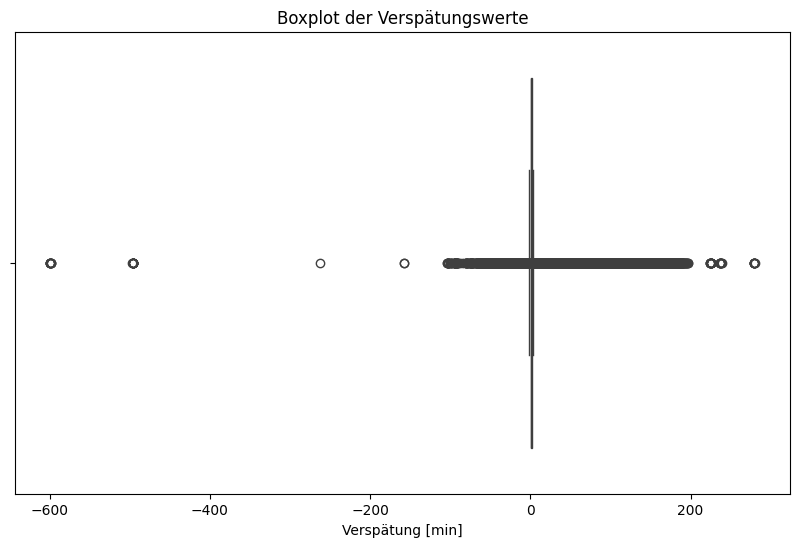

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_verkehr_2024_filtered["VERSPAETUNG [s]"] / 60)
plt.xlabel("Verspätung [min]")
plt.title("Boxplot der Verspätungswerte")
plt.show()


#### 2.2.1.10 Filterung der negativ- und Extremwerte

In [ ]:
filter_extrem_werte = df_verkehr_2024_filtered["VERSPAETUNG [s]"] < 1800
filter_negative_werte = df_verkehr_2024_filtered["VERSPAETUNG [s]"] > 60
df_verkehr_2024_filtered = df_verkehr_2024_filtered[filter_negative_werte & filter_extrem_werte]

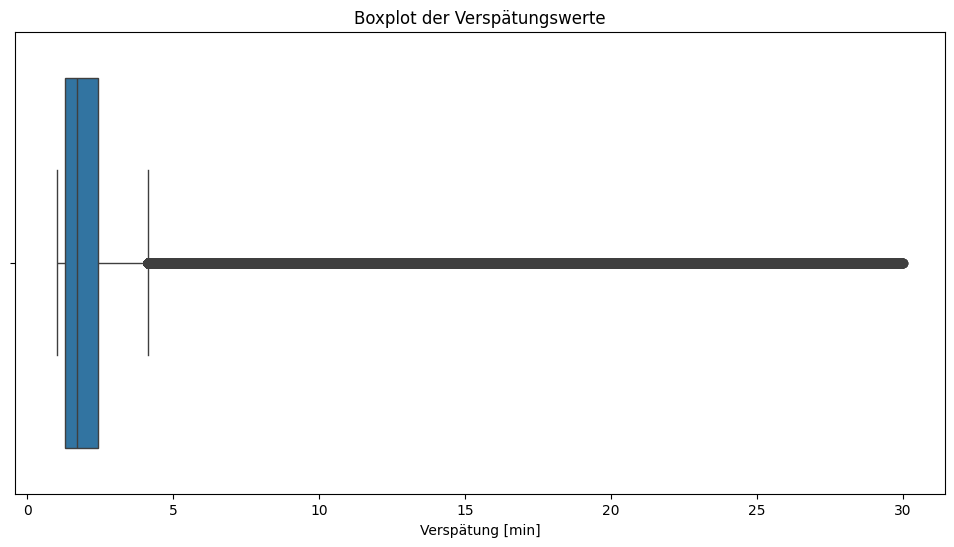

VERSPAETUNG [s]
61.0      179237
62.0      200840
63.0      198622
64.0      198623
65.0      189671
           ...  
1795.0        15
1796.0        15
1797.0        16
1798.0        10
1799.0         3
Name: count, Length: 1739, dtype: int64

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_verkehr_2024_filtered["VERSPAETUNG [s]"]/60)
plt.xlabel("Verspätung [min]")
plt.title("Boxplot der Verspätungswerte")
plt.show()

### 2.2.2 Wetterdaten

##### 2.2.2.1 Import Wetterdatensatz 1
Zunächst wurde auf IDAweb nach einer Wetterstation gesucht, die zentral in der Stadt Zürich liegt und genügend unterschiedliche, relevante und aktuelle Wetterdaten zur Verfügung stellt. Leider ist die Plattform nicht sehr benutzerfreundlich und die Suche erwies sich als sehr aufwändig. Nach erfolgter Suche wurde die Wetterstation Zürich Kaserne (NABZUE) als geeignetste Wetterstation identifiziert. Wir haben die folgenden fünf Wetterparameter (Granularität=stündlich) für den Zeitraum vom 1.1.2022 bis zum 31.12.2024 heruntergeladen:

-Böenspitze (Sekundenböe); Stundenmaximum in km/h

-Globalstrahlung; Stundenmittel in W/m²

-Lufttemperatur; 2 m über Boden; Stundenmittel in °C

-Niederschlag; Stundensumme in mm

-Windgeschwindigkeit skalar; Stundenmittel in km/h

Die Legende zum Wetterdatensatz kann in folgender Datei eingesehen werden: Legende_Wetterdatensatz1.txt

In [8]:
# 1.1 Wetterdatensatz 1 einlesen (Böenspitze_kmh, Globalstrahlung_Wm2, Temperatur_C, Niederschlag_mm, Windgeschwindigkeit_kmh)
url = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Wetterdaten/Wetterdatensatz1.csv"
df_wetter1= pd.read_csv(url, sep=";", encoding="utf-8")

# 1.2 Spaltennamen anpassen (gemäss der Legende)
parameter_mapping1 = {
    "fu3010h1": "Böenspitze_kmh",
    "gre000h0": "Globalstrahlung_Wm2",
    "tre200h0": "Temperatur_C",
    "rre150h0": "Niederschlag_mm",
    "fu3010h0": "Windgeschwindigkeit_kmh"
}

df_wetter1 = df_wetter1.rename(columns=parameter_mapping1)


# 1.3 'time' in Datumsformat umwandeln
df_wetter1['time'] = pd.to_datetime(df_wetter1['time'], format='%Y%m%d%H', errors='coerce')

# 1.4 Filtern nach dem Jahr 2024
df_wetter1 = df_wetter1[df_wetter1['time'].dt.year == 2024]

# 1.5 Ersten 10 Zeilen anzeigen
display(df_wetter1.head(10))

# 1.6 Anzahl der Einträge für das Jahr 2024
anzahl_2024 = len(df_wetter1)
print(f"Anzahl der Einträge für 2024: {anzahl_2024}")

,stn,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh
17520,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4
17521,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9
17522,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4
17523,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4
17524,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5
17525,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6
17526,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4
17527,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9
17528,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9
17529,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1


Anzahl der Einträge für 2024: 8784


##### 2.2.2.2 Import Wetterdatensatz 2
Im Wetterdatensatz 1 (Station Zürich Kaserne) sind leider keine Wetterdaten für Schnee, Hagel und Nebel vorhanden. Deshalb wurde nach einer anderen Wetterstation in Zürich gesucht, die diese Daten erfasst. Nach der Suche wurde die Wetterstation Zürich Kloten (KLO) als geeignetste Wetterstation identifiziert. Wir haben die folgenden vier Wetterparameter (Granularität=täglich) für den Zeitraum vom 1.1.2024 bis zum 31.12.2024 heruntergeladen:

-Neuschneehöhe; Tagessumme 6 UTC - 6 UTC Folgetag in cm

-Schneehöhe; Morgenmessung von 6 UTC in cm

-Tag mit Hagel; y/n

-Tag mit Nebel; y/n

Die Legende zum Wetterdatensatz kann in folgender Datei eingesehen werden: Legende_Wetterdatensatz2.txt


In [9]:
# 2.1 Wetterdatensatz 2 einlesen (Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel)
url2 = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Wetterdaten/Wetterdatensatz2.csv"
df_wetter2 = pd.read_csv(url2, sep=";", encoding="utf-8")

# 2.2 Spaltennamen anpassen (gemäss der Legende)
parameter_mapping2 = {
    "hns000d0": "Neuschneehöhe_cm",
    "hto000d0": "Schneehöhe_Morgenmessung_6_UTC_cm",
    "w3p002d0": "Tag_mit_Hagel",
    "w5p002d0": "Tag_mit_Nebel"
}

df_wetter2 = df_wetter2.rename(columns=parameter_mapping2)
df_wetter2 = df_wetter2.rename(columns={"stn": "stn2", "time": "time2"})

# 2.3 Konvertiere die 'time'-Spalte in df_wetter2 in das Datetime-Format
df_wetter2['time2'] = pd.to_datetime(df_wetter2['time2'], format='%Y%m%d', errors='coerce')

#  2.4 Ersten 10 Zeilen anzeigen
display(df_wetter2.head(10))

,stn2,time2,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel
0,KLO,2024-01-01,0,0,0,0
1,KLO,2024-01-02,0,0,0,0
2,KLO,2024-01-03,0,0,0,0
3,KLO,2024-01-04,0,0,0,0
4,KLO,2024-01-05,0,0,0,0
5,KLO,2024-01-06,0,0,0,0
6,KLO,2024-01-07,0,0,0,0
7,KLO,2024-01-08,0,0,0,0
8,KLO,2024-01-09,2,0,0,0
9,KLO,2024-01-10,0,2,0,0


##### 2.2.2.3 Zusammenführen der beiden Wetterdatensätze

Der Wetterdatensatz 2 hat nur eine tägliche Granularität, daher müssen die Tageswerte auf 24 Stunden multipliziert werden. Ansonsten kann das Zusammenführen der Datensätze aufgrund der unterschiedlichen Tabellenformate nicht funktionieren. Anschlissend werden die beiden Datensätze zusammengeführt.

In [10]:
#Beide Wetter Datensätze mergen

# 3.1 Wiederhole die täglichen Werte von df_wetter2 für jede Stunde des Tages
df_wetter2_repeated = df_wetter2.loc[df_wetter2.index.repeat(24)].reset_index(drop=True)

# 3.2 Kombiniere die beiden DataFrames
df_wetter = pd.concat([df_wetter1.reset_index(drop=True), df_wetter2_repeated], axis=1)

# 3.3 Entferne die Spalten 'stn2' und 'time2' aus dem kombinierten DataFrame
df_wetter = df_wetter.drop(columns=['stn2', 'time2'])

# 3.4 Zeige die ersten 10 Zeilen des kombinierten DataFrames an
display(df_wetter.head(10))

,stn,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel
0,NABZUE,2024-01-01 00:00:00,40.7,3,5.1,0.0,10.4,0,0,0,0
1,NABZUE,2024-01-01 01:00:00,24.8,-1,5.1,0.0,7.9,0,0,0,0
2,NABZUE,2024-01-01 02:00:00,32.0,-1,5.2,0.0,9.4,0,0,0,0
3,NABZUE,2024-01-01 03:00:00,21.2,0,5.3,0.1,9.4,0,0,0,0
4,NABZUE,2024-01-01 04:00:00,50.4,0,4.9,1.1,15.5,0,0,0,0
5,NABZUE,2024-01-01 05:00:00,33.5,0,5.3,0.0,12.6,0,0,0,0
6,NABZUE,2024-01-01 06:00:00,33.8,0,5.6,0.0,10.4,0,0,0,0
7,NABZUE,2024-01-01 07:00:00,36.7,0,6.0,0.0,11.9,0,0,0,0
8,NABZUE,2024-01-01 08:00:00,35.3,12,6.3,0.0,11.9,0,0,0,0
9,NABZUE,2024-01-01 09:00:00,31.3,51,6.7,0.0,10.1,0,0,0,0


##### 2.2.2.4 Datenbereinigung & Formatierung

Die relevanten Spalten wurden in numerische Werte (Float) umgewandelt. Ungültige Werte (-) wurden als NaN markiert und anschliessend mit dem Durchschnitt der jeweiligen Spalte ersetzt. Abschliessend wurde die Anzahl verbleibender NaN-Werte ausgegeben, um sicherzustellen, dass keine Datenlücken mehr vorhanden sind.


In [11]:
# 4.1 Umwandlung der angegebenen Spalten in float
columns_to_convert = ["Böenspitze_kmh", "Globalstrahlung_Wm2", "Windgeschwindigkeit_kmh", "Neuschneehöhe_cm", "Schneehöhe_Morgenmessung_6_UTC_cm"]

# 4.1.1 Ersetzen von "-" durch NaN in den relevanten Spalten
df_wetter[columns_to_convert] = df_wetter[columns_to_convert].replace("-", np.nan)

# 4.1.2 Konvertierung der Spalten in float
df_wetter[columns_to_convert] = df_wetter[columns_to_convert].astype(float)

# 4.2 Konvertierung der Spalten in Float, fehlerhafte Werte als NaN setzen
df_wetter[columns_to_convert] = df_wetter[columns_to_convert].astype(float)

# 4.3 Überprüfen, ob die Umwandlung geklappt hat
print(df_wetter.dtypes)

# 4.4 Ersetzen von "-" durch NaN
df_wetter.replace("-", np.nan, inplace=True)

# 4.5 Alle Zeilen mit NaN-Werten extrahieren
df_nan = df_wetter[df_wetter.isna().any(axis=1)]

# 4.6 Durchschnitt für jede Spalte berechnen und fehlende Werte durch den jeweiligen Durchschnitt ersetzen
df_wetter.fillna(df_wetter.mean(numeric_only=True), inplace=True)

# 4.7 Anzahl der NaN-Werte pro Spalte anzeigen
nan_summary = df_wetter.isna().sum()

# 4.8 Anzahl der NaN-Werte pro Spalte ausgeben
print("Anzahl der NaN-Werte pro Spalte:")
print(nan_summary)

stn                                          object
time                                 datetime64[ns]
Böenspitze_kmh                              float64
Globalstrahlung_Wm2                         float64
Temperatur_C                                float64
Niederschlag_mm                             float64
Windgeschwindigkeit_kmh                     float64
Neuschneehöhe_cm                            float64
Schneehöhe_Morgenmessung_6_UTC_cm           float64
Tag_mit_Hagel                                 int64
Tag_mit_Nebel                                 int64
dtype: object
Anzahl der NaN-Werte pro Spalte:
stn                                  0
time                                 0
Böenspitze_kmh                       0
Globalstrahlung_Wm2                  0
Temperatur_C                         0
Niederschlag_mm                      0
Windgeschwindigkeit_kmh              0
Neuschneehöhe_cm                     0
Schneehöhe_Morgenmessung_6_UTC_cm    0
Tag_mit_Hagel                 

##### 2.2.2.5 Überprüfung der Wetterdaten

Zur Plausibilitätsprüfung der Wetterdaten wurde ein Plot erstellt, der die geglättete Temperatur über den Jahresverlauf darstellt. Die Visualisierung zeigt ein erwartbares Muster: höhere Temperaturen im Sommer und niedrigere Temperaturen im Winter. Dies bestätigt die Plausibilität der Daten.

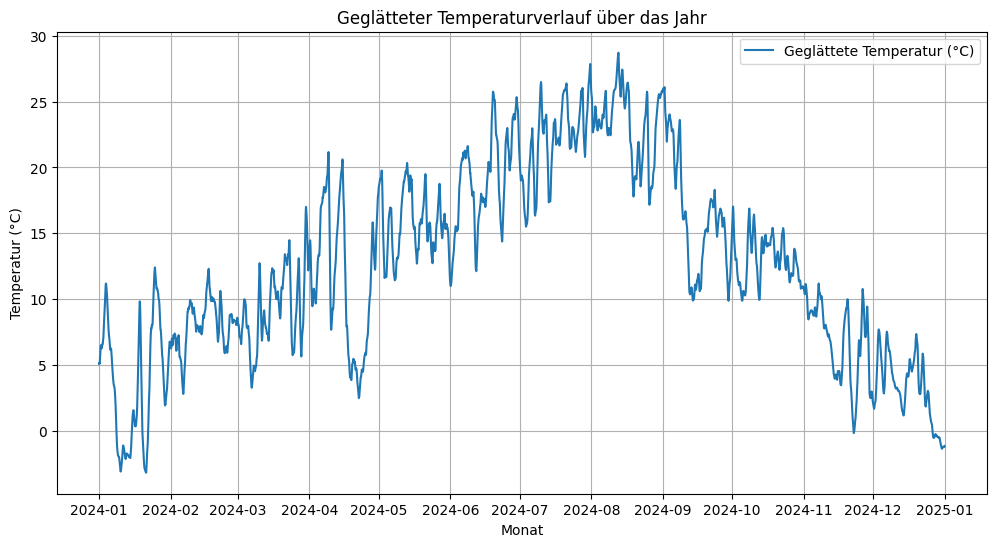

In [12]:
import matplotlib.dates as mdates
# 5.1 Gleitender Mittelwert (Moving Average) über 24 Stunden zur Glättung
df_wetter['Temperatur_Glatt'] = df_wetter['Temperatur_C'].rolling(window=24, min_periods=1).mean()

# 5.2 Liniendiagramm mit geglätteten Werten
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_wetter['time'], y=df_wetter['Temperatur_Glatt'], label='Geglättete Temperatur (°C)')

# 5.3 Achsentitel und Diagrammtitel setzen
plt.xlabel('Monat')
plt.ylabel('Temperatur (°C)')
plt.title('Geglätteter Temperaturverlauf über das Jahr')

# 5.4 X-Achse so formatieren, dass jeder Rasterpunkt einen Monat zeigt
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Jeden Monat einen Rasterpunkt setzen
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format als "YYYY-MM"

# 5.5 Legende und Raster hinzufügen
plt.legend()
plt.grid()

# 5.6 Diagramm anzeigen
plt.show()

In [13]:
df_wetter.describe()

,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel,Temperatur_Glatt
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2024-07-01 23:30:00,18.137074,128.763568,12.683003,0.134882,7.836387,0.076503,0.155738,0.002732,0.117486,12.691263
min,2024-01-01 00:00:00,3.600000,-7.000000,-5.100000,0.000000,1.400000,0.000000,0.000000,0.000000,0.000000,-3.158333
25%,2024-04-01 11:45:00,11.200000,-1.000000,7.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,7.204167
50%,2024-07-01 23:30:00,15.800000,4.000000,12.000000,0.000000,7.200000,0.000000,0.000000,0.000000,0.000000,12.218750
75%,2024-10-01 11:15:00,22.300000,168.000000,18.400000,0.000000,9.700000,0.000000,0.000000,0.000000,0.000000,18.333333
max,2024-12-31 23:00:00,83.900000,1039.000000,34.600000,11.700000,31.000000,17.000000,17.000000,1.000000,1.000000,28.704167
std,NaN,10.000674,216.765757,7.739708,0.549063,3.948387,0.943623,1.161988,0.052202,0.322017,7.301960


### 2.2.2.3 Zusammenführen der Verkehrsdaten und Wetterdaten

In [14]:
#Aggregiere die Verspätungen auf stündliche Intervalle
# Neue Spalte: Stündlich abgerundeter Timestamp (z. B. 2025-02-22 12:00:00)
df_verkehr_2024_filtered["ABFAHRTSZEIT_aggregiert"] = df_verkehr_2024_filtered["ABFAHRTSZEIT"].dt.floor("H")
display(df_verkehr_2024_filtered.head(10))

C:\Users\Donat\AppData\Local\Temp\ipykernel_25760\1894873724.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_verkehr_2024_filtered["ABFAHRTSZEIT_aggregiert"] = df_verkehr_2024_filtered["ABFAHRTSZEIT"].dt.floor("H")


,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],ABFAHRTSZEIT_aggregiert
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,-69.0,2024-01-01 04:00:00
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,-68.0,2024-01-01 04:00:00
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,-72.0,2024-01-01 04:00:00
3,2,"Zürich,Kalkbreite/Bhf.Wiedikon",2024-01-01 04:39:00,2024-01-01 04:39:42,REAL,-42.0,2024-01-01 04:00:00
4,12,"Zürich, Sternen Oerlikon",2024-01-01 04:40:00,2024-01-01 04:40:00,REAL,0.0,2024-01-01 04:00:00
5,2,"Zürich, Lochergut",2024-01-01 04:40:00,2024-01-01 04:40:45,REAL,-45.0,2024-01-01 04:00:00
6,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,-138.0,2024-01-01 04:00:00
7,12,"Zürich, Bahnhof Oerlikon Ost",2024-01-01 04:41:00,2024-01-01 04:41:47,REAL,-47.0,2024-01-01 04:00:00
8,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,-187.0,2024-01-01 04:00:00
9,2,"Zürich, Zypressenstrasse",2024-01-01 04:41:00,2024-01-01 04:41:44,REAL,-44.0,2024-01-01 04:00:00


In [15]:
# Zeitstempel konvertieren (ohne Zeitzonenanpassung)
df_wetter["timestamp_merge"] = pd.to_datetime(df_wetter["time"], format="%Y%m%d%H", errors="coerce")

# Merge mit den Verkehrsdaten
# Annahme: df_merged ist der DataFrame mit den Verkehrsdaten und enthält eine Spalte "ABFAHRTSZEIT_aggregiert"
df_merged = pd.merge(
    df_verkehr_2024_filtered,  # Verkehrsdaten
    df_wetter,  # Wetterdaten
    left_on="ABFAHRTSZEIT_aggregiert",  # Zeitstempel in den Verkehrsdaten
    right_on="timestamp_merge",         # Zeitstempel in den Wetterdaten
    how="left"  # Behalte alle Verkehrsdaten, auch wenn keine Wetterdaten vorhanden sind
)

# 1.3 Überprüfen des gemergten DataFrames
display(df_merged.head(10))

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],ABFAHRTSZEIT_aggregiert,stn,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh,Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel,Temperatur_Glatt,timestamp_merge
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,-69.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,2024-01-01 04:00:00
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,-68.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,2024-01-01 04:00:00
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,-72.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,2024-01-01 04:00:00
3,2,"Zürich,Kalkbreite/Bhf.Wiedikon",2024-01-01 04:39:00,2024-01-01 04:39:42,REAL,-42.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,2024-01-01 04:00:00
4,12,"Zürich, Sternen Oerlikon",2024-01-01 04:40:00,2024-01-01 04:40:00,REAL,0.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,2024-01-01 04:00:00
5,2,"Zürich, Lochergut",2024-01-01 04:40:00,2024-01-01 04:40:45,REAL,-45.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,2024-01-01 04:00:00
6,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,-138.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,2024-01-01 04:00:00
7,12,"Zürich, Bahnhof Oerlikon Ost",2024-01-01 04:41:00,2024-01-01 04:41:47,REAL,-47.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,2024-01-01 04:00:00
8,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,-187.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,2024-01-01 04:00:00
9,2,"Zürich, Zypressenstrasse",2024-01-01 04:41:00,2024-01-01 04:41:44,REAL,-44.0,2024-01-01 04:00:00,NABZUE,2024-01-01 04:00:00,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,2024-01-01 04:00:00


#Analyse der Tramlinien und ihrem Abstand zur Wetterstation

In [16]:
df_merged.columns

Index(['LINIEN_TEXT', 'HALTESTELLEN_NAME', 'ABFAHRTSZEIT', 'AB_PROGNOSE',
       'AB_PROGNOSE_STATUS', 'VERSPAETUNG [s]', 'ABFAHRTSZEIT_aggregiert',
       'stn', 'time', 'Böenspitze_kmh', 'Globalstrahlung_Wm2', 'Temperatur_C',
       'Niederschlag_mm', 'Windgeschwindigkeit_kmh', 'Neuschneehöhe_cm',
       'Schneehöhe_Morgenmessung_6_UTC_cm', 'Tag_mit_Hagel', 'Tag_mit_Nebel',
       'Temperatur_Glatt', 'timestamp_merge'],
      dtype='object')

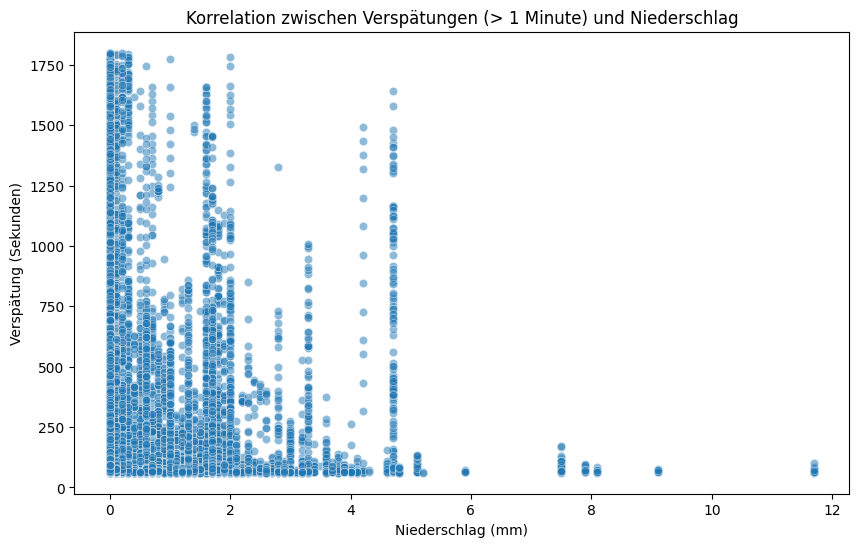

In [17]:
# Filtere nur die Verspätungen zwischen 1 Minute (60 Sekunden) und 30 Minuten (1800 Sekunden)
df_delay_rain = df_merged[(df_merged["VERSPAETUNG [s]"] > 60) & (df_merged["VERSPAETUNG [s]"] <= 1800)]

# Erstelle einen Scatterplot für Verspätung vs. Niederschlag
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_delay_rain["Niederschlag_mm"], y=df_delay_rain["VERSPAETUNG [s]"], alpha=0.5)

# Achsenbeschriftung und Titel
plt.xlabel("Niederschlag (mm)")
plt.ylabel("Verspätung (Sekunden)")
plt.title("Korrelation zwischen Verspätungen (> 1 Minute) und Niederschlag")

# Anzeige des Diagramms
plt.show()

In [18]:
correlation = df_delay_rain[["VERSPAETUNG [s]", "Niederschlag_mm"]].corr()
print("Korrelationsmatrix:")
print(correlation)

Korrelationsmatrix:
                 VERSPAETUNG [s]  Niederschlag_mm
VERSPAETUNG [s]         1.000000         0.054888
Niederschlag_mm         0.054888         1.000000


In [22]:
# 1. Alle negativen Verspätungen anzeigen
negative_verspaetungen = df_merged[df_merged['VERSPAETUNG [s]'] < 0]
print(negative_verspaetungen[['VERSPAETUNG [s]']])

# 2. Prozentualer Anteil negativer Werte
total_count = df_merged['VERSPAETUNG [s]'].count()
negative_count = negative_verspaetungen['VERSPAETUNG [s]'].count()
anteil_negativ = (negative_count / total_count) * 100

print(f"\nAnzahl negativer Werte: {negative_count}")
print(f"Gesamtanzahl: {total_count}")
print(f"Prozentualer Anteil negativer Werte: {anteil_negativ:.2f}%")

          VERSPAETUNG [s]
0                   -69.0
1                   -68.0
2                   -72.0
3                   -42.0
5                   -45.0
...                   ...
30038770            -39.0
30038771            -26.0
30038772            -20.0
30038773            -20.0
30038775            -37.0

[25734322 rows x 1 columns]

Anzahl negativer Werte: 25734322
Gesamtanzahl: 30038760
Prozentualer Anteil negativer Werte: 85.67%


---
## 3 Datenanalyse

---
## 4 Präsentation der Ergebnisse